# POO - Implémentation d'un neurone artificiel "from scratch"

Ce notebook a pour but de démontrer comment implémenter un neurone artificiel, orienté objet, sans utiliser de framework de deep learning (comme TensorFlow ou PyTorch). Nous allons générer un jeu de données simple, entraîner un neurone en utilisant la descente de gradient, visualiser la frontière de décision et évaluer les performances du modèle.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

## Génération d'un dataset

Dimensions of X: (100, 2)
Dimensions of y: (100, 1)


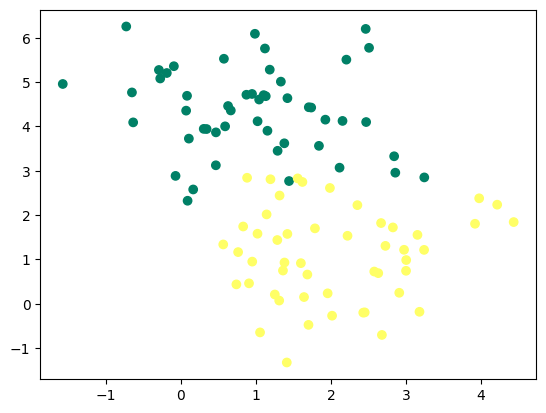

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print("Dimensions of X:", X.shape)
print("Dimensions of y:", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

## Classe du neurone

In [3]:
class ArtificialNeuron:

    def __init__(self, learning_rate=0.1, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.W = None
        self.b = None
        self.Loss = []

    def initialisation(self, X):
        self.W = np.random.rand(X.shape[1], 1)
        self.b = np.random.rand(1)

    def model(self, X):
        Z = X.dot(self.W) + self.b
        A = 1 / (1 + np.exp(-Z))
        return A
    
    def log_loss(self, A, y):
        m = len(y)
        loss = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
        return loss
    
    def gradients(self, A, X, y):
        m = len(y)
        dW = 1/m * np.dot(X.T, (A - y))
        db = 1/m * np.sum(A - y)
        return (dW, db)
    
    def update(self, dW, db):
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        A = self.model(X)
        return A >= 0.5
    
    def train(self, X, y):
        self.initialisation(X)
        self.Loss = []

        for i in range(self.n_iter):
            A = self.model(X)
            loss = self.log_loss(A, y)
            self.Loss.append(loss)
            dW, db = self.gradients(A, X, y)
            self.update(dW, db)

        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        print("The accuracy of the model is: ", accuracy)

        plt.plot(self.Loss)
        plt.title('Loss')
        plt.show()

        return (self.W, self.b)

## Création du neurone et enregistrement des paramètres

The accuracy of the model is:  0.92


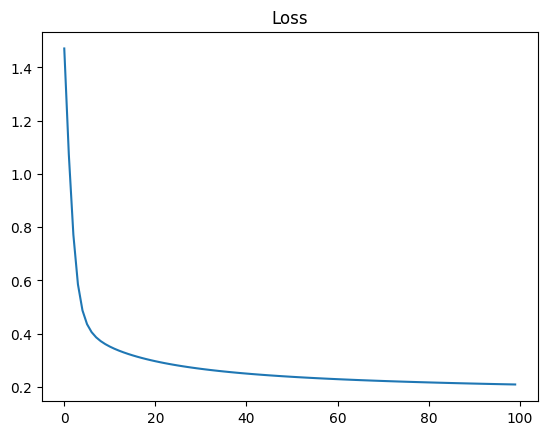

In [4]:
neuron = ArtificialNeuron(learning_rate=0.1, n_iter=100)
W, b = neuron.train(X, y)

## Prédiction sur une nouvelle donnée X et frontière de décision

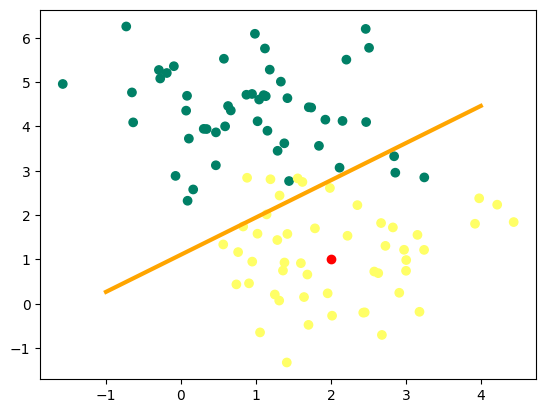

[ True]


In [5]:
new_dataX = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = -(W[0] * x0 + b) / W[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_dataX[0], new_dataX[1], c='red')
plt.plot(x0, x1.flatten(), color='orange', lw=3)
plt.show()

print(neuron.predict(new_dataX))

## Visualisation 3D

In [6]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [7]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))
fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))
fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()